In [4]:
using CSV
input="plik.csv"
mydata=CSV.read(input, delim=",")

,rozmiar,czas,rodzaj
,Int64,Float64,String
1,5000000,0.1,V
2,5000000,0.1,V
3,5000000,0.1,V
4,5000000,0.1,V
5,5000000,0.09,V
6,5000000,0.1,V
7,5000000,0.09,V
8,5000000,0.1,V
9,5000000,0.09,V


In [13]:
typeof(mydata)

DataFrame

In [14]:
size(mydata)

(110, 3)

In [5]:
using DataFrames
using Statistics
using Plots
mean_grouped=by(mydata,[:rozmiar,:rodzaj],df->mean(df[!,2]))

,rozmiar,rodzaj,x1
,Int64,String,Float64
1,5000000,V,0.0965
2,6000000,V,0.114
3,7000000,V,0.133
4,8000000,V,0.148
5,9000000,V,0.166
6,1000,M,0.006
7,2000,M,0.028
8,3000,M,0.066
9,4000,M,0.132


In [7]:
std_grouped=by(mydata,[:rozmiar,:rodzaj],df->std(df[!,2]))

,rozmiar,rodzaj,x1
,Int64,String,Float64
1,5000000,V,0.00587143
2,6000000,V,0.00516398
3,7000000,V,0.00483046
4,8000000,V,0.00788811
5,9000000,V,0.00699206
6,1000,M,0.00516398
7,2000,M,0.00421637
8,3000,M,0.00516398
9,4000,M,0.00421637


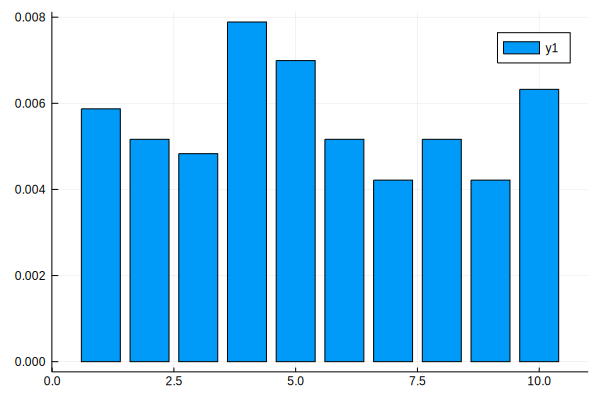

In [81]:
using Plots
bar(std_grouped.x1)

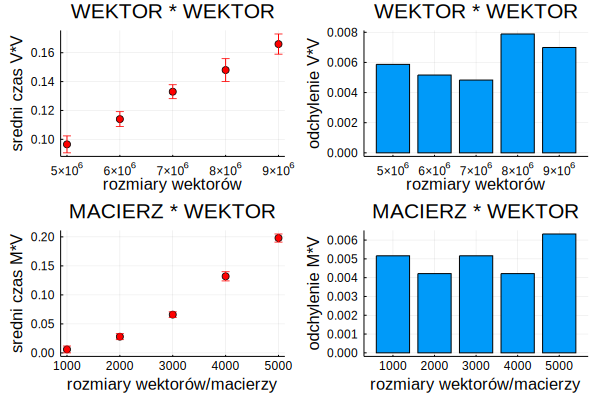

In [40]:
using Plots
p1 = scatter(mean_grouped_V.rozmiar,mean_grouped_V.x1, ylabel = "sredni czas V*V", xlabel = "rozmiary wektorów", colour=[:red], title = "WEKTOR * WEKTOR",yerr = std_grouped.x1)
p2 = bar(std_grouped_V.rozmiar,std_grouped_V.x1, ylabel = "odchylenie V*V", xlabel = "rozmiary wektorów", title = "WEKTOR * WEKTOR")
p3 = scatter(mean_grouped_M.rozmiar,mean_grouped_M.x1,ylabel = "sredni czas M*V", xlabel = "rozmiary wektorów/macierzy",colour=[:red], title = "MACIERZ * WEKTOR",yerr = std_grouped.x1)
p4 = bar(std_grouped_M.rozmiar,std_grouped_M.x1, ylabel = "odchylenie M*V", xlabel = "rozmiary wektorów/macierzy", title = "MACIERZ * WEKTOR")
plot(p1, p2, p3,p4,layout = 4, legend = false)

In [38]:
mean_grouped_V = first(mean_grouped,5)

,rozmiar,rodzaj,x1
,Int64,String,Float64
1,5000000,V,0.0965
2,6000000,V,0.114
3,7000000,V,0.133
4,8000000,V,0.148
5,9000000,V,0.166


In [39]:
mean_grouped_M = last(mean_grouped,5)

,rozmiar,rodzaj,x1
,Int64,String,Float64
1,1000,M,0.006
2,2000,M,0.028
3,3000,M,0.066
4,4000,M,0.132
5,5000,M,0.198


In [ ]:
scatter(mean_grouped[!,1], mean_grouped[!,3], group=mean_grouped[!,2], colour = [:red :blue], layout=2)

In [19]:
std_grouped_V = first(std_grouped,5)

,rozmiar,rodzaj,x1
,Int64,String,Float64
1,5000000,V,0.00587143
2,6000000,V,0.00516398
3,7000000,V,0.00483046
4,8000000,V,0.00788811
5,9000000,V,0.00699206


In [20]:
std_grouped_M = last(std_grouped,5)

,rozmiar,rodzaj,x1
,Int64,String,Float64
1,1000,M,0.00516398
2,2000,M,0.00421637
3,3000,M,0.00516398
4,4000,M,0.00421637
5,5000,M,0.00632456
